# TO RUN
1. Make sure you installed all the dependencies
2. open **'init_notebook.py'** and change the **projectFolder** to the src folder of the repository.
3. In the following cell change the dataDir to the data directory of the InD dataset

In [1]:
# dataDir = "/Users/zarifikram/Documents/Repos/drone-dataset-tools/data/ind"
dataDir = "E:/Datasets/inD-dataset-v1.0/data/"
# dataDir = "G:AV datasets/inD-dataset-v1.0/data"

In [2]:
exec(open('init_notebook.py').read())

current working dirD:\AV\DataSetExploration\drone-dataset-tools\src


In [3]:
%load_ext autoreload
%autoreload 2


In [4]:
import logging
logging.basicConfig(level=logging.INFO)
from loguru import logger
logger.remove()
logger.add(sys.stdout, format="{level} {message}", filter="my_module", level="INFO")

from extractors.loader import Loader

In [5]:
loader = Loader(dataDir, 'inD')

# LocationData - for aggregation

**get all the unique crossing ids**
```
loc2data = loader.getLocationData(2)
loc2data.getUniqueCrossingIds()
```
**get all the crossing data by scene config**
```
loc2data = loader.getLocationData(2, useSceneConfigToExtract=True)
crossingDf = loc2data.getCrossingDf()
```

## First we start from scratch. 

In [6]:
loc2data = loader.getLocationData(2, useSceneConfigToExtract=True, recordingIds=[18])
loc2data.save("../data") # whole thing as a dill object

loc2data.buildLocalInformationForScenes()



INFO:root:recordingIds: [18]
INFO:root:Downsampling recording 18 from 25.0 to 5
recording-18-scene10-bicycle-Ids: 100%|████████████████████████████████████████████████| 92/92 [00:02<00:00, 42.06it/s]
recording-18-scene10-truck_bus-Ids: 0it [00:00, ?it/s]
recording-18-scene11-bicycle-Ids: 100%|████████████████████████████████████████████████| 92/92 [00:02<00:00, 43.26it/s]
recording-18-scene11-truck_bus-Ids: 0it [00:00, ?it/s]
recording-18-scene20-bicycle-Ids: 100%|████████████████████████████████████████████████| 92/92 [00:02<00:00, 43.02it/s]
recording-18-scene20-truck_bus-Ids: 0it [00:00, ?it/s]
recording-18-scene21-bicycle-Ids: 100%|████████████████████████████████████████████████| 92/92 [00:02<00:00, 43.17it/s]
recording-18-scene21-truck_bus-Ids: 0it [00:00, ?it/s]
recording-18-scene22-bicycle-Ids: 100%|████████████████████████████████████████████████| 92/92 [00:02<00:00, 42.67it/s]
recording-18-scene22-truck_bus-Ids: 0it [00:00, ?it/s]
recording-18-scene30-bicycle-Ids: 100%|██████

using range (0.0, 3.0)


clipping ped trajectories for scene # 10 with width offset 4.0: 100%|██████████████████| 36/36 [00:00<00:00, 49.54it/s]
clipping other trajectories for scene # 10: 100%|████████████████████████████████████| 119/119 [00:01<00:00, 62.76it/s]
INFO:root:Scene 10: transforming trajectories to scene coordinates
INFO:root:Scene 10: adding dynamics
INFO:root:Scene 10: trimming head and tail
INFO:root:Scene 10: clipping trimmed data
clipping ped trajectories for scene # 10 with width offset 0.0: 100%|█████████████████| 36/36 [00:00<00:00, 124.54it/s]
INFO:root:Scene 10: building clipped track meta
INFO:root:SceneData 20: moving outlier peds to others. We should only find outliers in the clipped trajectories?
INFO:root:Scene 20: clipping original data


fast_pedestrian 18156: moving 18156 to others as speed is unrealistic
fast_pedestrian 18319: moving 18319 to others as speed is unrealistic
fast_pedestrian 18322: moving 18322 to others as speed is unrealistic
fast_pedestrian 18396: moving 18396 to others as speed is unrealistic
fast_pedestrian 18408: moving 18408 to others as speed is unrealistic
pedestrian 18388: enters the scene 2 times
bicycle 18045: enters the scene 4 times
bicycle 18045: Disregarding as the length 0.10516475122397448 is too short or rows too less (26)
bicycle 18045: Disregarding as the length 0.09814129660851399 is too short or rows too less (30)
bicycle 18045: Disregarding as the length 0.08265402107580888 is too short or rows too less (3)
fast_pedestrian 18408: enters the scene 3 times
Clipping after trimming lost 2 pedestrian tracks: {1838800, 1838801}
problematic tracks: defaultdict(<function SceneData.buildLocalInformation.<locals>.<lambda> at 0x00000231391B54C0>, {'fast_pedestrian': {18408, 18156, 18319, 18

clipping ped trajectories for scene # 20 with width offset 4.0: 100%|██████████████████| 13/13 [00:00<00:00, 44.07it/s]
clipping other trajectories for scene # 20: 100%|████████████████████████████████████| 142/142 [00:02<00:00, 66.11it/s]
INFO:root:Scene 20: transforming trajectories to scene coordinates
INFO:root:Scene 20: adding dynamics
INFO:root:Scene 20: trimming head and tail
INFO:root:Scene 20: clipping trimmed data
clipping ped trajectories for scene # 20 with width offset 0.0: 100%|██████████████████| 13/13 [00:00<00:00, 99.89it/s]
INFO:root:Scene 20: building clipped track meta
INFO:root:SceneData 21: moving outlier peds to others. We should only find outliers in the clipped trajectories?
INFO:root:Scene 21: clipping original data



problematic tracks: defaultdict(<function SceneData.buildLocalInformation.<locals>.<lambda> at 0x00000231391B5700>, {'fast_pedestrian': set()})
using range (0.0, 3.0)


clipping ped trajectories for scene # 21 with width offset 4.0: 100%|████████████████████| 5/5 [00:00<00:00, 38.39it/s]
clipping other trajectories for scene # 21: 100%|████████████████████████████████████| 153/153 [00:02<00:00, 67.18it/s]
INFO:root:Scene 21: transforming trajectories to scene coordinates
INFO:root:Scene 21: adding dynamics
INFO:root:Scene 21: trimming head and tail
INFO:root:Scene 21: clipping trimmed data
clipping ped trajectories for scene # 21 with width offset 0.0: 100%|███████████████████| 5/5 [00:00<00:00, 152.26it/s]
INFO:root:Scene 21: building clipped track meta
INFO:root:SceneData 22: moving outlier peds to others. We should only find outliers in the clipped trajectories?
INFO:root:Scene 22: clipping original data


fast_pedestrian 18379: moving 18379 to others as speed is unrealistic
pedestrian 18074: enters the scene 2 times
pedestrian 18116: enters the scene 2 times
Clipping after trimming lost 4 pedestrian tracks: {1807400, 1807401, 1811601, 1811600}
problematic tracks: defaultdict(<function SceneData.buildLocalInformation.<locals>.<lambda> at 0x00000231391B5790>, {'fast_pedestrian': {18379}})
using range (0.0, 3.0)


clipping ped trajectories for scene # 22 with width offset 4.0: 100%|████████████████████| 4/4 [00:00<00:00, 45.52it/s]
clipping other trajectories for scene # 22: 100%|████████████████████████████████████| 150/150 [00:02<00:00, 70.82it/s]
INFO:root:Scene 22: transforming trajectories to scene coordinates
INFO:root:Scene 22: adding dynamics
INFO:root:Scene 22: trimming head and tail
INFO:root:Scene 22: clipping trimmed data
clipping ped trajectories for scene # 22 with width offset 0.0: 100%|████████████████████| 4/4 [00:00<00:00, 71.30it/s]
INFO:root:Scene 22: building clipped track meta
INFO:root:SceneData 30: moving outlier peds to others. We should only find outliers in the clipped trajectories?
INFO:root:Scene 30: clipping original data



problematic tracks: defaultdict(<function SceneData.buildLocalInformation.<locals>.<lambda> at 0x00000231391B59D0>, {'fast_pedestrian': set()})
using range (0.0, 3.0)


clipping ped trajectories for scene # 30 with width offset 4.0: 100%|██████████████████| 36/36 [00:00<00:00, 40.31it/s]
clipping other trajectories for scene # 30: 100%|████████████████████████████████████| 108/108 [00:01<00:00, 64.59it/s]
INFO:root:Scene 30: transforming trajectories to scene coordinates
INFO:root:Scene 30: adding dynamics
INFO:root:Scene 30: trimming head and tail
INFO:root:Scene 30: clipping trimmed data
clipping ped trajectories for scene # 30 with width offset 0.0: 100%|█████████████████| 36/36 [00:00<00:00, 104.80it/s]
INFO:root:Scene 30: building clipped track meta
INFO:root:SceneData 31: moving outlier peds to others. We should only find outliers in the clipped trajectories?
INFO:root:Scene 31: clipping original data


fast_pedestrian 18020: moving 18020 to others as speed is unrealistic
fast_pedestrian 18026: moving 18026 to others as speed is unrealistic
fast_pedestrian 18072: moving 18072 to others as speed is unrealistic
fast_pedestrian 18100: moving 18100 to others as speed is unrealistic
fast_pedestrian 18148: moving 18148 to others as speed is unrealistic
fast_pedestrian 18353: moving 18353 to others as speed is unrealistic
fast_pedestrian 18396: moving 18396 to others as speed is unrealistic
fast_pedestrian 18408: moving 18408 to others as speed is unrealistic
fast_pedestrian 18409: moving 18409 to others as speed is unrealistic
bicycle 18358: enters the scene 2 times
fast_pedestrian 18396: enters the scene 2 times
problematic tracks: defaultdict(<function SceneData.buildLocalInformation.<locals>.<lambda> at 0x00000231391B5B80>, {'fast_pedestrian': {18020, 18148, 18408, 18409, 18026, 18353, 18100, 18072, 18396}})
using range (0.0, 3.0)


clipping ped trajectories for scene # 31 with width offset 4.0: 100%|████████████████████| 1/1 [00:00<00:00, 55.55it/s]
clipping other trajectories for scene # 31: 100%|████████████████████████████████████████| 7/7 [00:00<00:00, 77.58it/s]
INFO:root:Scene 31: transforming trajectories to scene coordinates
INFO:root:Scene 31: adding dynamics
INFO:root:Scene 31: trimming head and tail
INFO:root:Scene 31: clipping trimmed data
clipping ped trajectories for scene # 31 with width offset 0.0: 100%|███████████████████| 1/1 [00:00<00:00, 110.93it/s]
INFO:root:Scene 31: building clipped track meta
INFO:root:SceneData 40: moving outlier peds to others. We should only find outliers in the clipped trajectories?
INFO:root:Scene 40: clipping original data



problematic tracks: defaultdict(<function SceneData.buildLocalInformation.<locals>.<lambda> at 0x00000231391B55E0>, {'fast_pedestrian': set()})
using range (0.0, 3.0)


clipping ped trajectories for scene # 40 with width offset 4.0: 100%|████████████████████| 8/8 [00:00<00:00, 36.54it/s]
clipping other trajectories for scene # 40: 100%|██████████████████████████████████████| 68/68 [00:00<00:00, 81.42it/s]
INFO:root:Scene 40: transforming trajectories to scene coordinates
INFO:root:Scene 40: adding dynamics
INFO:root:Scene 40: trimming head and tail
INFO:root:Scene 40: clipping trimmed data
clipping ped trajectories for scene # 40 with width offset 0.0: 100%|███████████████████| 8/8 [00:00<00:00, 109.59it/s]
INFO:root:Scene 40: building clipped track meta



problematic tracks: defaultdict(<function SceneData.buildLocalInformation.<locals>.<lambda> at 0x00000231391B5CA0>, {'fast_pedestrian': set()})


# Saving and Loading pre--processed Location data

In [7]:
loc2data.saveSceneDataOnly("../data")
loc2data.saveCrossingDf("../data")
loc2data.save("../data") # whole thing as a dill object
loc2data.summary()

{'#original frameRate': 25.0,
 '#crossing trajectories': 99,
 '#scene trajectories': 100,
 'scene#10 peds': 35,
 'scene#10 others': 121,
 'scene#20 peds': 13,
 'scene#20 others': 142,
 'scene#21 peds': 3,
 'scene#21 others': 153,
 'scene#22 peds': 4,
 'scene#22 others': 150,
 'scene#30 peds': 36,
 'scene#30 others': 110,
 'scene#31 peds': 1,
 'scene#31 others': 7,
 'scene#40 peds': 8,
 'scene#40 others': 68}

In [ ]:
from extractors.LocationData import LocationData
loc2dataFromFile = LocationData.load("../data/location-2/lab", "2022-12-03-fps-5-before-local.dill")
loc2dataFromFile.buildLocalInformationForScenes()

In [7]:
loc2dataFromFile.saveCrossingDf("../data")
loc2dataFromFile.saveSceneDataOnly("../data")
loc2dataFromFile.save("../data") # whole thing as a dill object
loc2dataFromFile.summary()

{'#original frameRate': 25.0,
 '#crossing trajectories': 1347,
 '#scene trajectories': 1469,
 'scene#10 peds': 572,
 'scene#10 others': 1668,
 'scene#11 peds': 7,
 'scene#11 others': 1212,
 'scene#20 peds': 168,
 'scene#20 others': 2003,
 'scene#21 peds': 52,
 'scene#21 others': 2302,
 'scene#22 peds': 49,
 'scene#22 others': 2221,
 'scene#30 peds': 418,
 'scene#30 others': 1467,
 'scene#31 peds': 19,
 'scene#31 others': 134,
 'scene#40 peds': 184,
 'scene#40 others': 1171}

In [ ]:
from extractors.LocationData import LocationData
loc2dataFromFile = LocationData.load("../data/location-2", "2022-11-12-all.dill")

# Validate if there are trajectories not captured by the scene-based extractor

In [8]:
from tools.TrajectoryUtils import TrajectoryUtils
from tools.TrajectoryVisualizer import TrajectoryVisualizer
import matplotlib.pyplot as plt
import numpy as np
visualizer = TrajectoryVisualizer(loader)

In [ ]:
# visualizer.showLocationCrossingTracks(loc2data)

In [ ]:
sceneData = loc2data.getSceneData(40, 10, 5, refresh=False)
# sceneData = loc2data.getSceneData(10, 10, 5, refresh=False)
# dir(sceneData)
# sceneData.pedData
# sceneDf = loc2data.getSceneCrossingDf('10', 0, 0)
clippedPedDf = sceneData.getPedDataInSceneCoordinates()
clippedPedDf.head()
# sceneData.pedData.head()

In [ ]:
visualizer.showLocationSceneData(sceneData

In [ ]:
scene11Data = loc2data.getSceneData(11, 10, 6, refresh=False)
visualizer.showLocationSceneData(scene11Data)

In [ ]:
scene20Data = loc2data.getSceneData(20, 10, 6, refresh=False)
visualizer.showLocationSceneData(scene20Data)

scene21Data = loc2data.getSceneData(21, 20, 9, refresh=False)
visualizer.showLocationSceneData(scene21Data, onlyClipped=False)

scene22Data = loc2data.getSceneData(22, 10, 6, refresh=False)
visualizer.showLocationSceneData(scene22Data)

In [ ]:
scene30Data = loc2data.getSceneData(30, 10, 6, refresh=False)
visualizer.showLocationSceneData(scene30Data)

scene31Data = loc2data.getSceneData(31, 10, 6, refresh=False)
visualizer.showLocationSceneData(scene31Data)

In [ ]:
scene40Data = loc2data.getSceneData(40, 6, 6, refresh=False)
visualizer.showLocationSceneData(scene40Data)

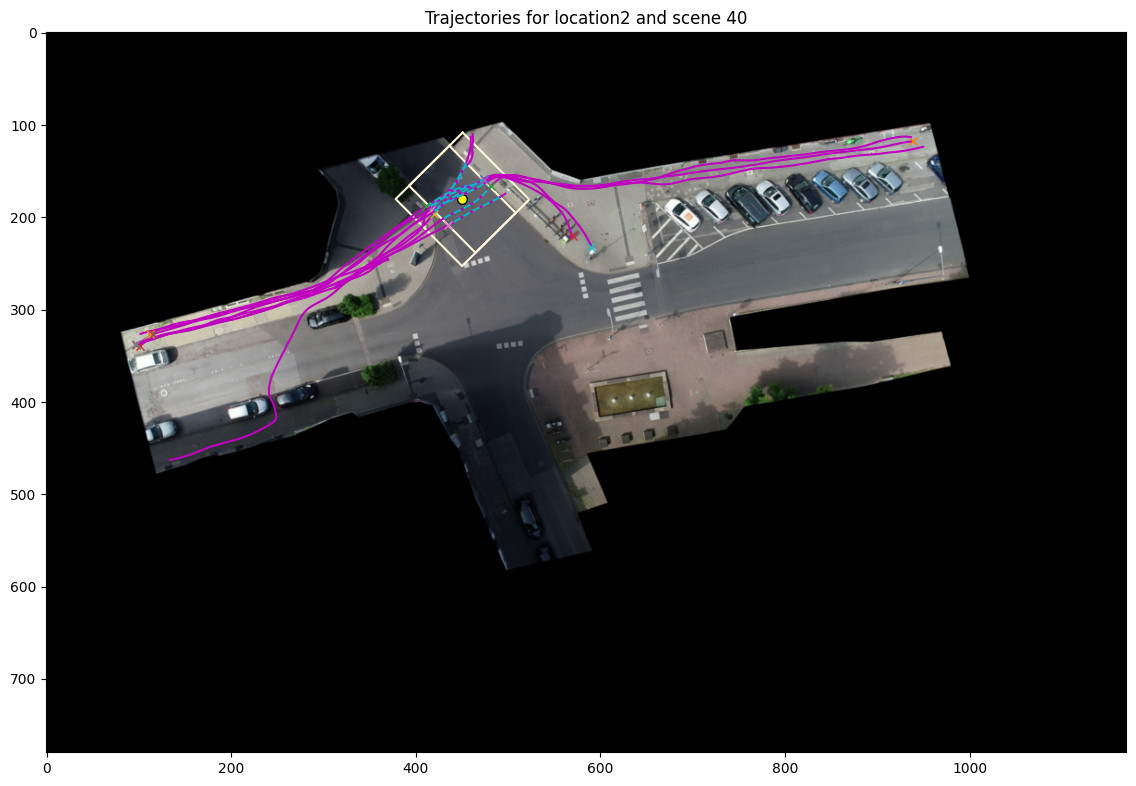

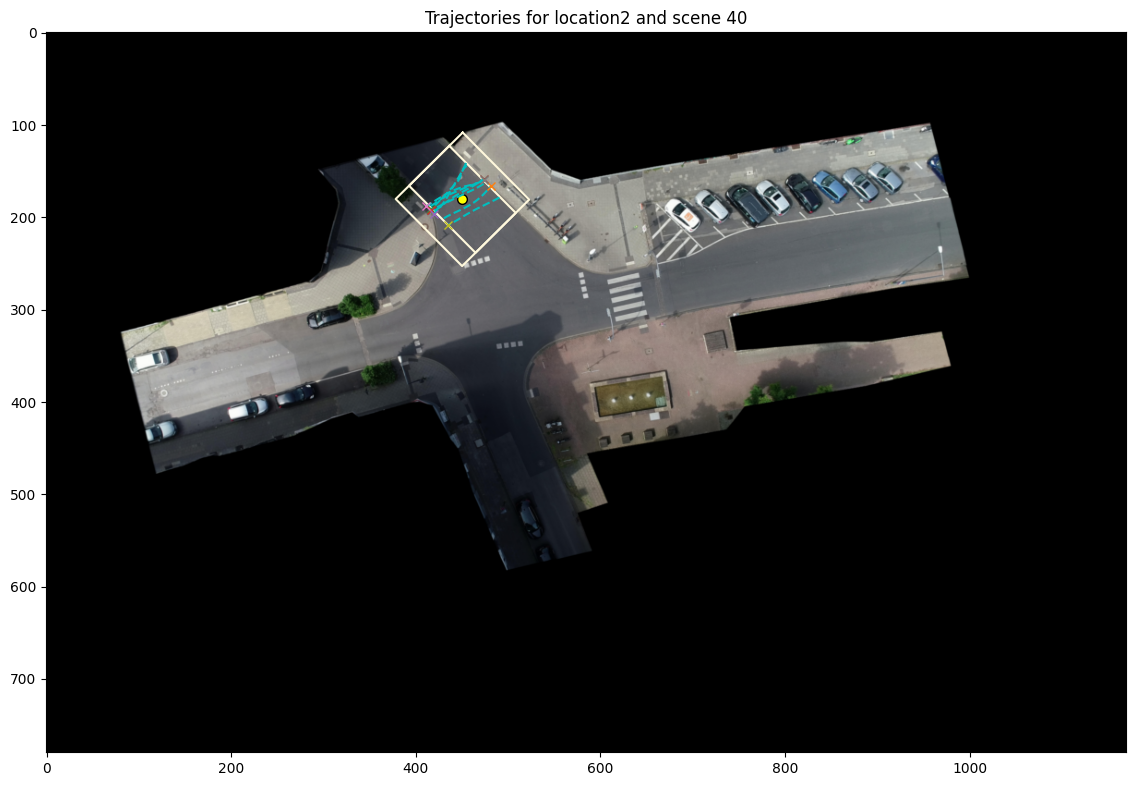

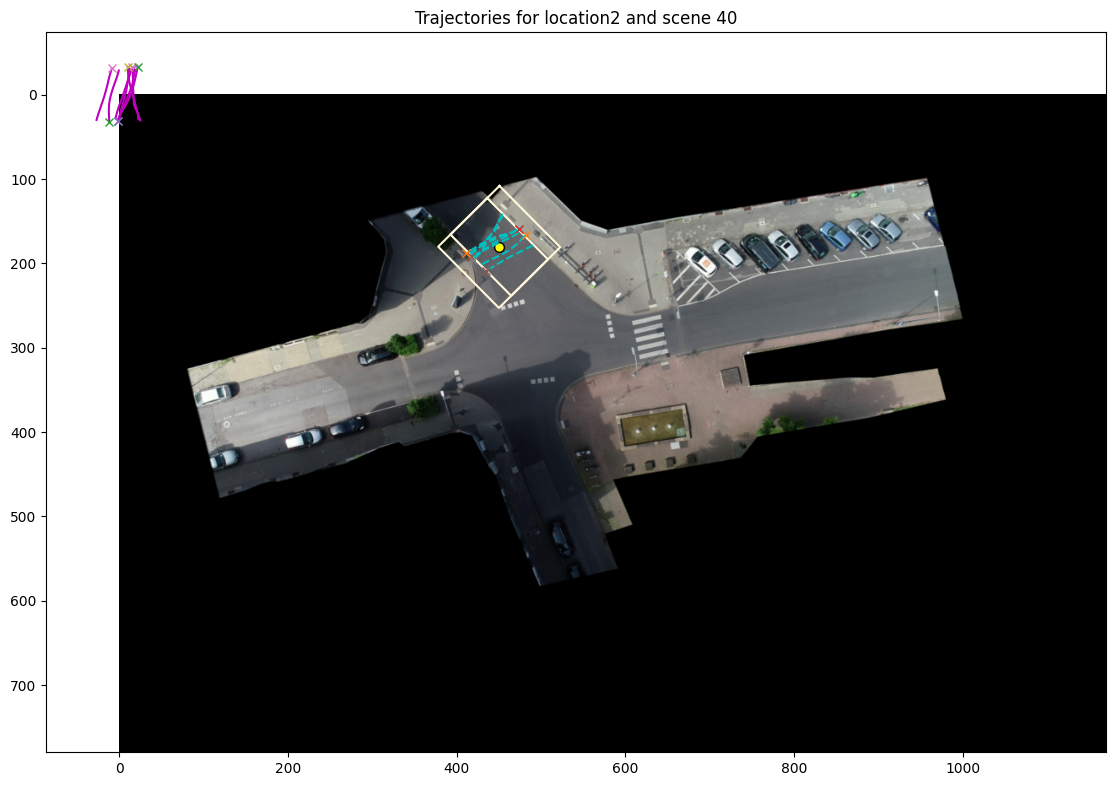

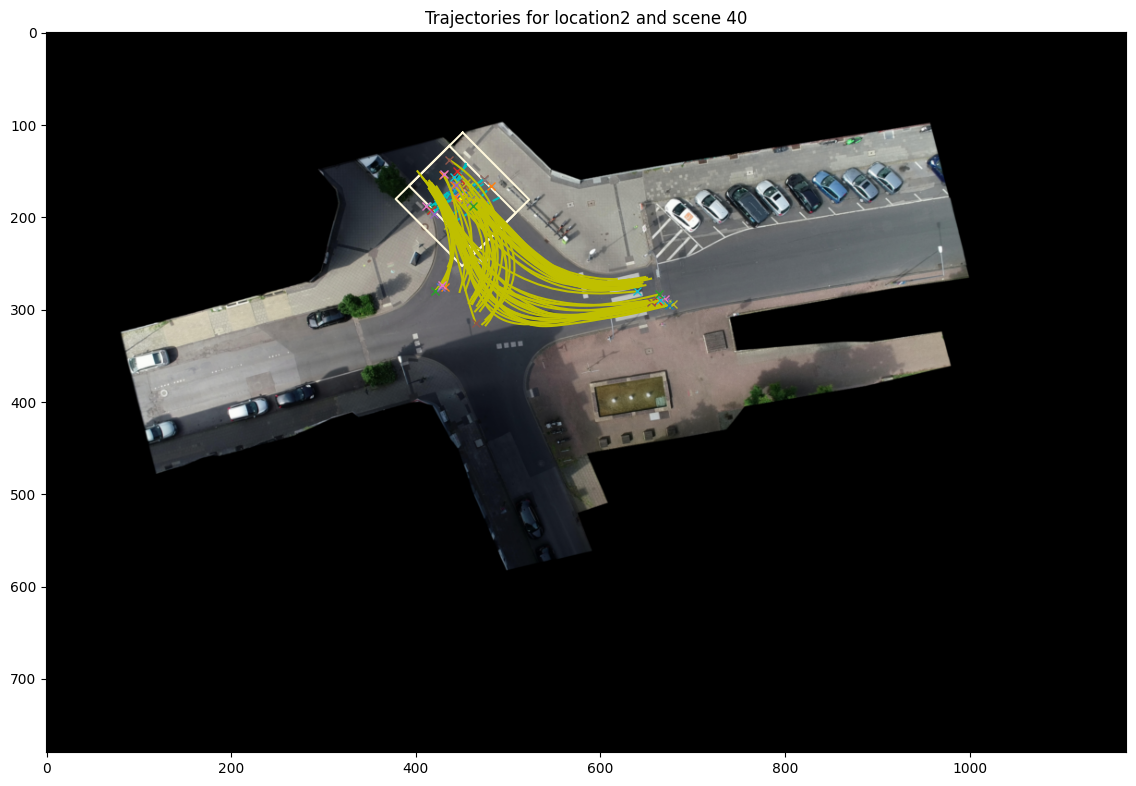

In [10]:
# all combination of visualization
scene40Data = loc2data.getSceneData(40, 6, 6, refresh=False)
visualizer.showLocationSceneData(scene40Data)
visualizer.showLocationSceneData(scene40Data, onlyClipped=True)
visualizer.showLocationSceneData(scene40Data, onlyClipped=True, showLocal=True)
visualizer.showLocationSceneData(scene40Data, onlyClipped=True, showLocal=False, showOthers=True)

In [ ]:
for 